In [6]:
# ------------ Imports ----------------
from polygon import *
from math_tools import *
from billiard import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

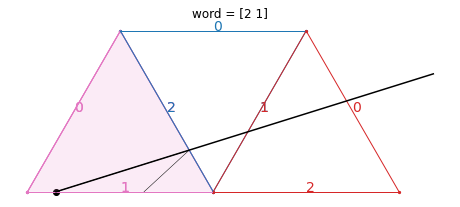

In [29]:

vertices  = []

r1 = 1
for k in range(3):
    vertices.append(
        [r1*np.cos(2*np.pi*k/3+np.pi/2), r1*np.sin(2*np.pi*k/3+np.pi/2)]
        )

vertices = np.array(vertices)

P = polygon(vertices)

P.plot_polygon(display_symbols = True, original = True)


bllrd = Billiards(P) 
initial_condition = np.array([[ -0.6,-0.5],[1,0]])
bllrd.dynamics(initial_condition = initial_condition,
               num_its = 2)
bllrd.plot_billiard()


#
word = bllrd.symbolics
unfolding = unfold(P, word, display_symbols = True, plot = True)
plot_development(initial_condition, unfolding, bllrd.ax)
plt.title("word = " + str(word))
plt.show()


In [36]:
def plot_image(M,cols):
    # 0 is white and 1 is grey
    cmap = colors.ListedColormap(cols)
    plt.figure(4,figsize=M.shape[::-1])
    plt.pcolor(np.flip(M, 0),cmap=cmap,edgecolors='k', linewidths=1)
    plt.xticks([])
    plt.yticks([])

In [ ]:
a = (vertices[2,:] - vertices[1,:])
b = (vertices[0,:] - vertices[2,:])
c = (vertices[1,:] - vertices[0,:])

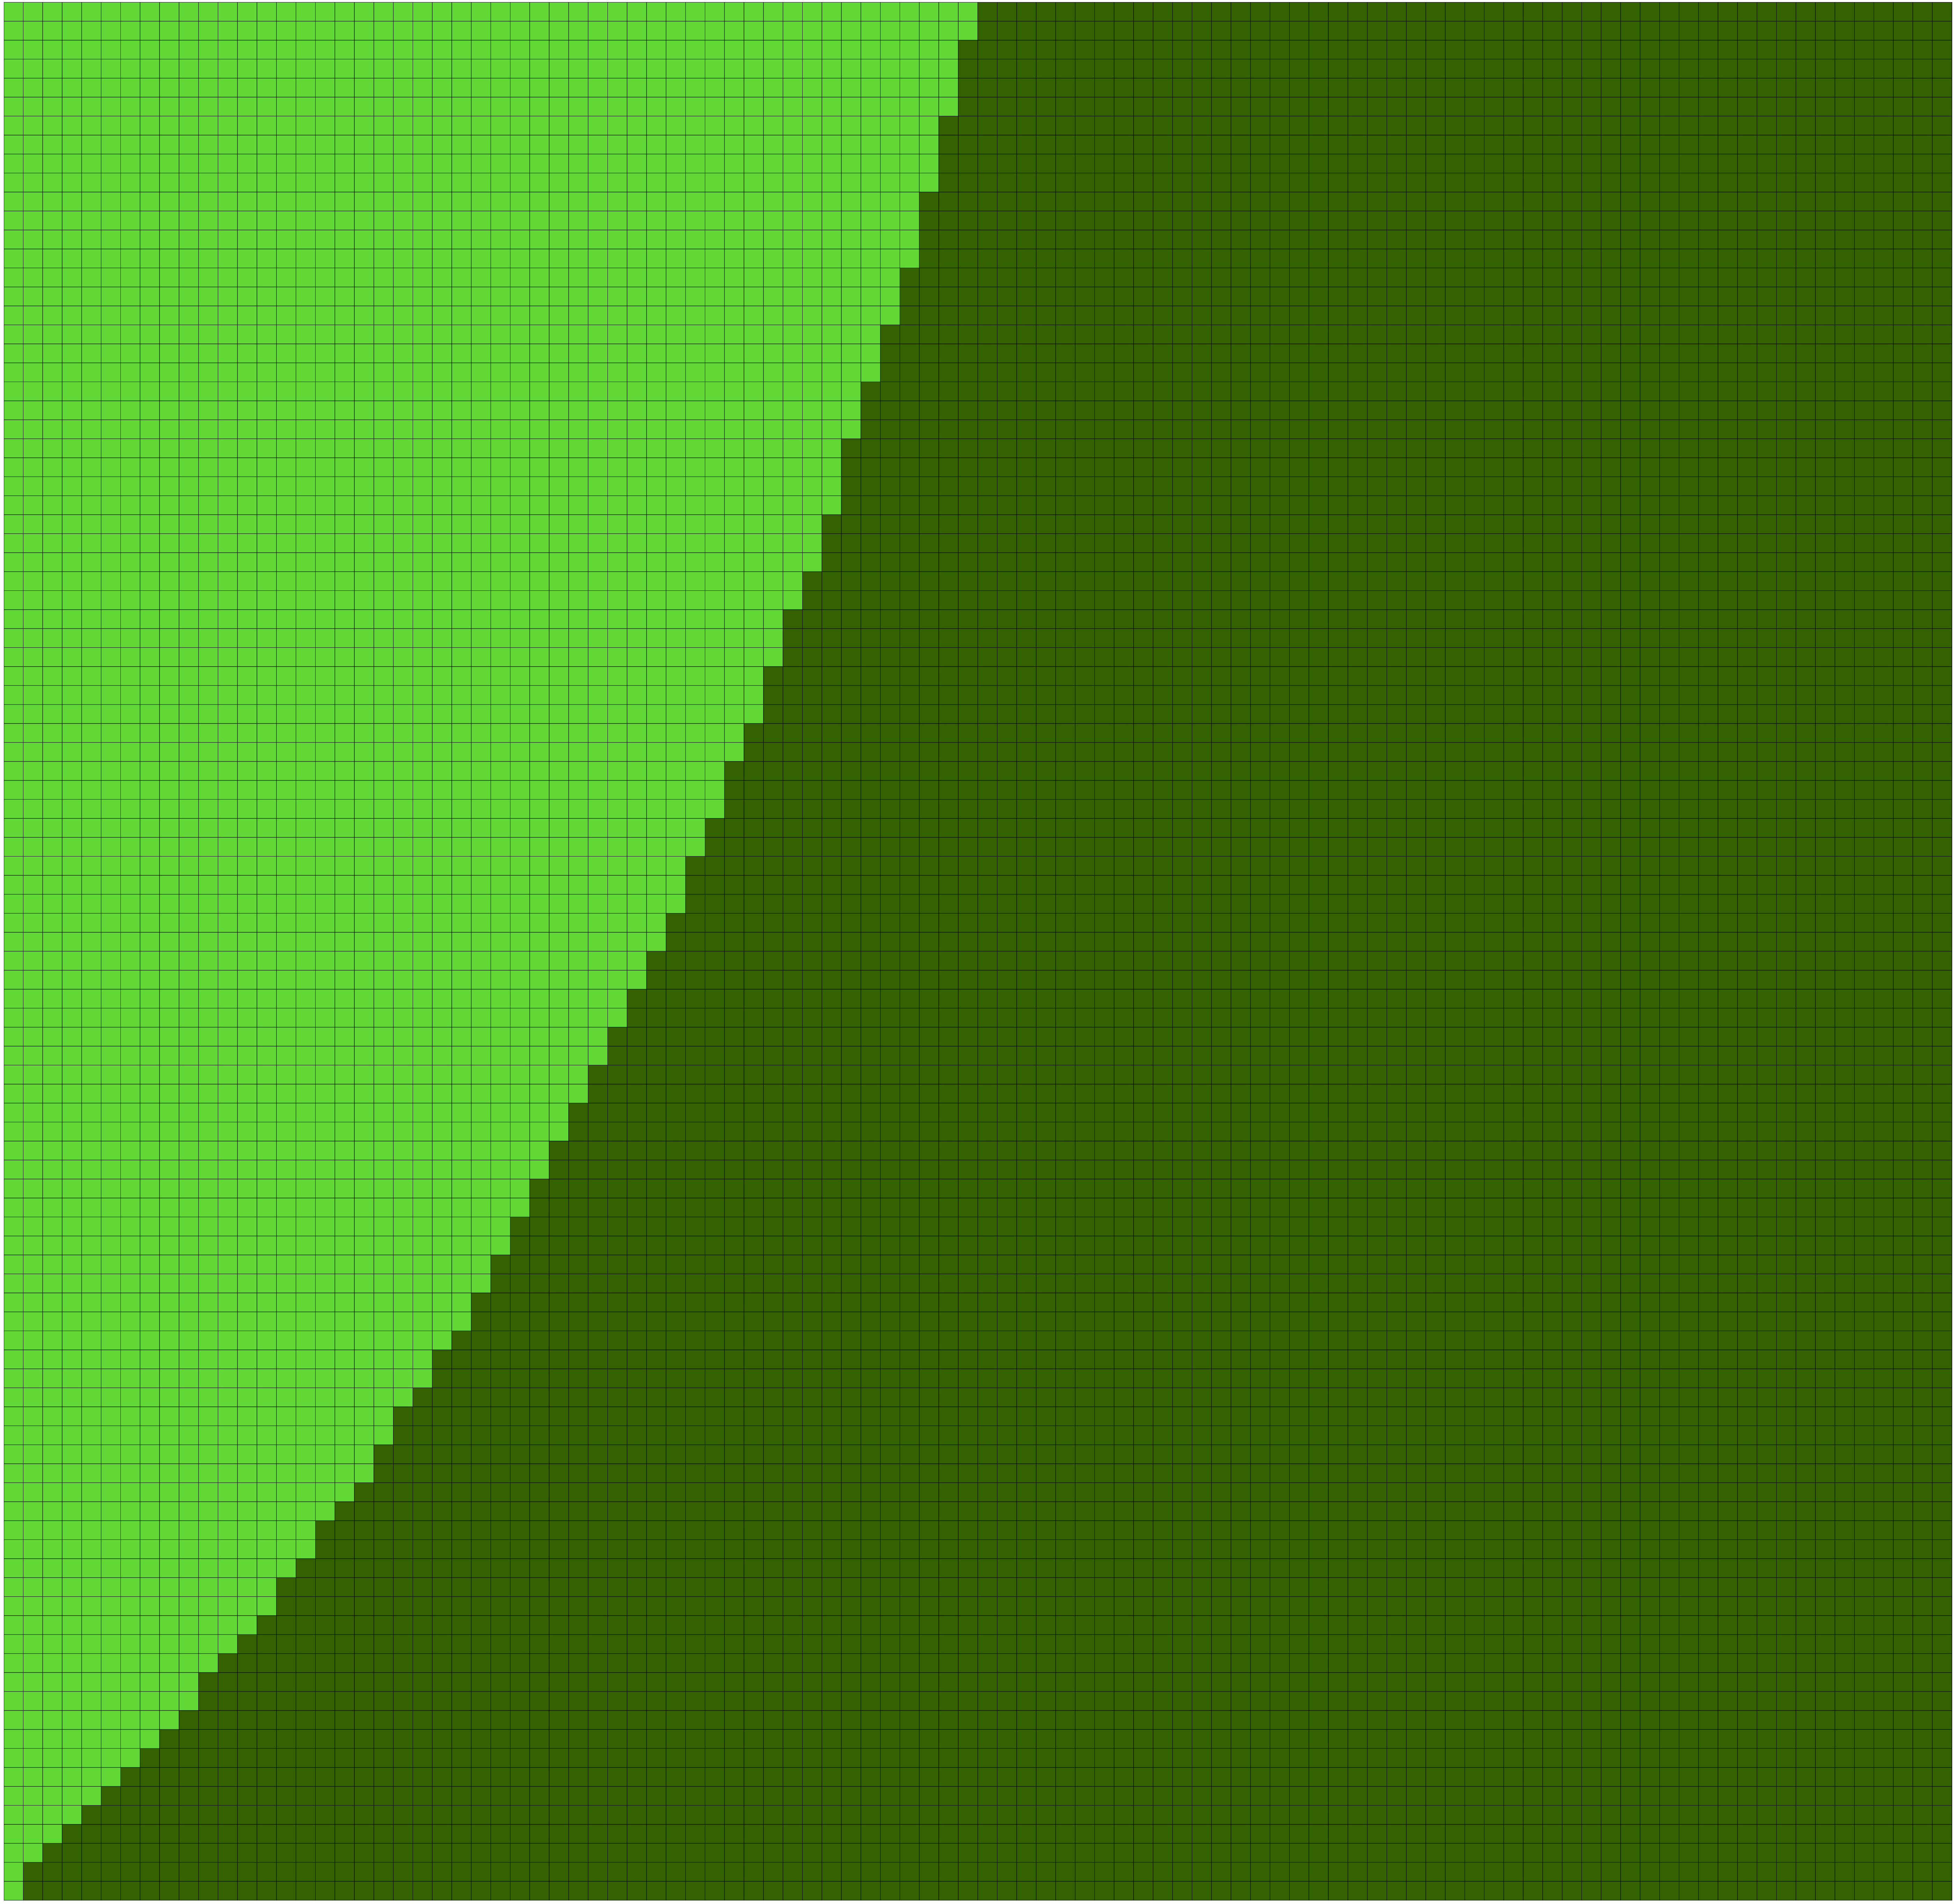

In [58]:
# a to b

disc = 100
bit = np.zeros((disc,disc))

t1s = np.linspace(0.00001,0.9999,disc)
t2s = np.linspace(0.00001,0.9999,disc)

cols = [np.array([97,216,54])/255, np.array([52,98,0])/255]
# light green, dark green

for i in range(len(t1s)):
    for j in range(len(t2s)):
        t1 = t1s[i]
        t2 = t2s[j]
        base = t1 * (vertices[2,:] - vertices[1,:]) + vertices[1,:]
        head = t2 * (vertices[0,:] - vertices[2,:]) + vertices[2,:]

        bllrd = Billiards(P) # instantiate the Billiards
        initial_condition = np.array([base,head])
        bllrd.dynamics(initial_condition = initial_condition,
                       num_its = 2)
        word = bllrd.symbolics
        if np.all(word == [2, 0]):
            # second color
            bit[i,j] = 1
            # a to b to c
        if np.all(word == [2, 1]):
            # first color
            bit[i,j] = 0
            
            # a to b to a
            
plot_image(bit,cols)
plt.savefig("July11,2023/a_to_b_July_11.pdf",bbox_inches='tight')


In [59]:
initial_condition

array([[ 8.65852199e-01, -5.00000000e-01],
       [ 8.66025404e-05,  9.99850000e-01]])

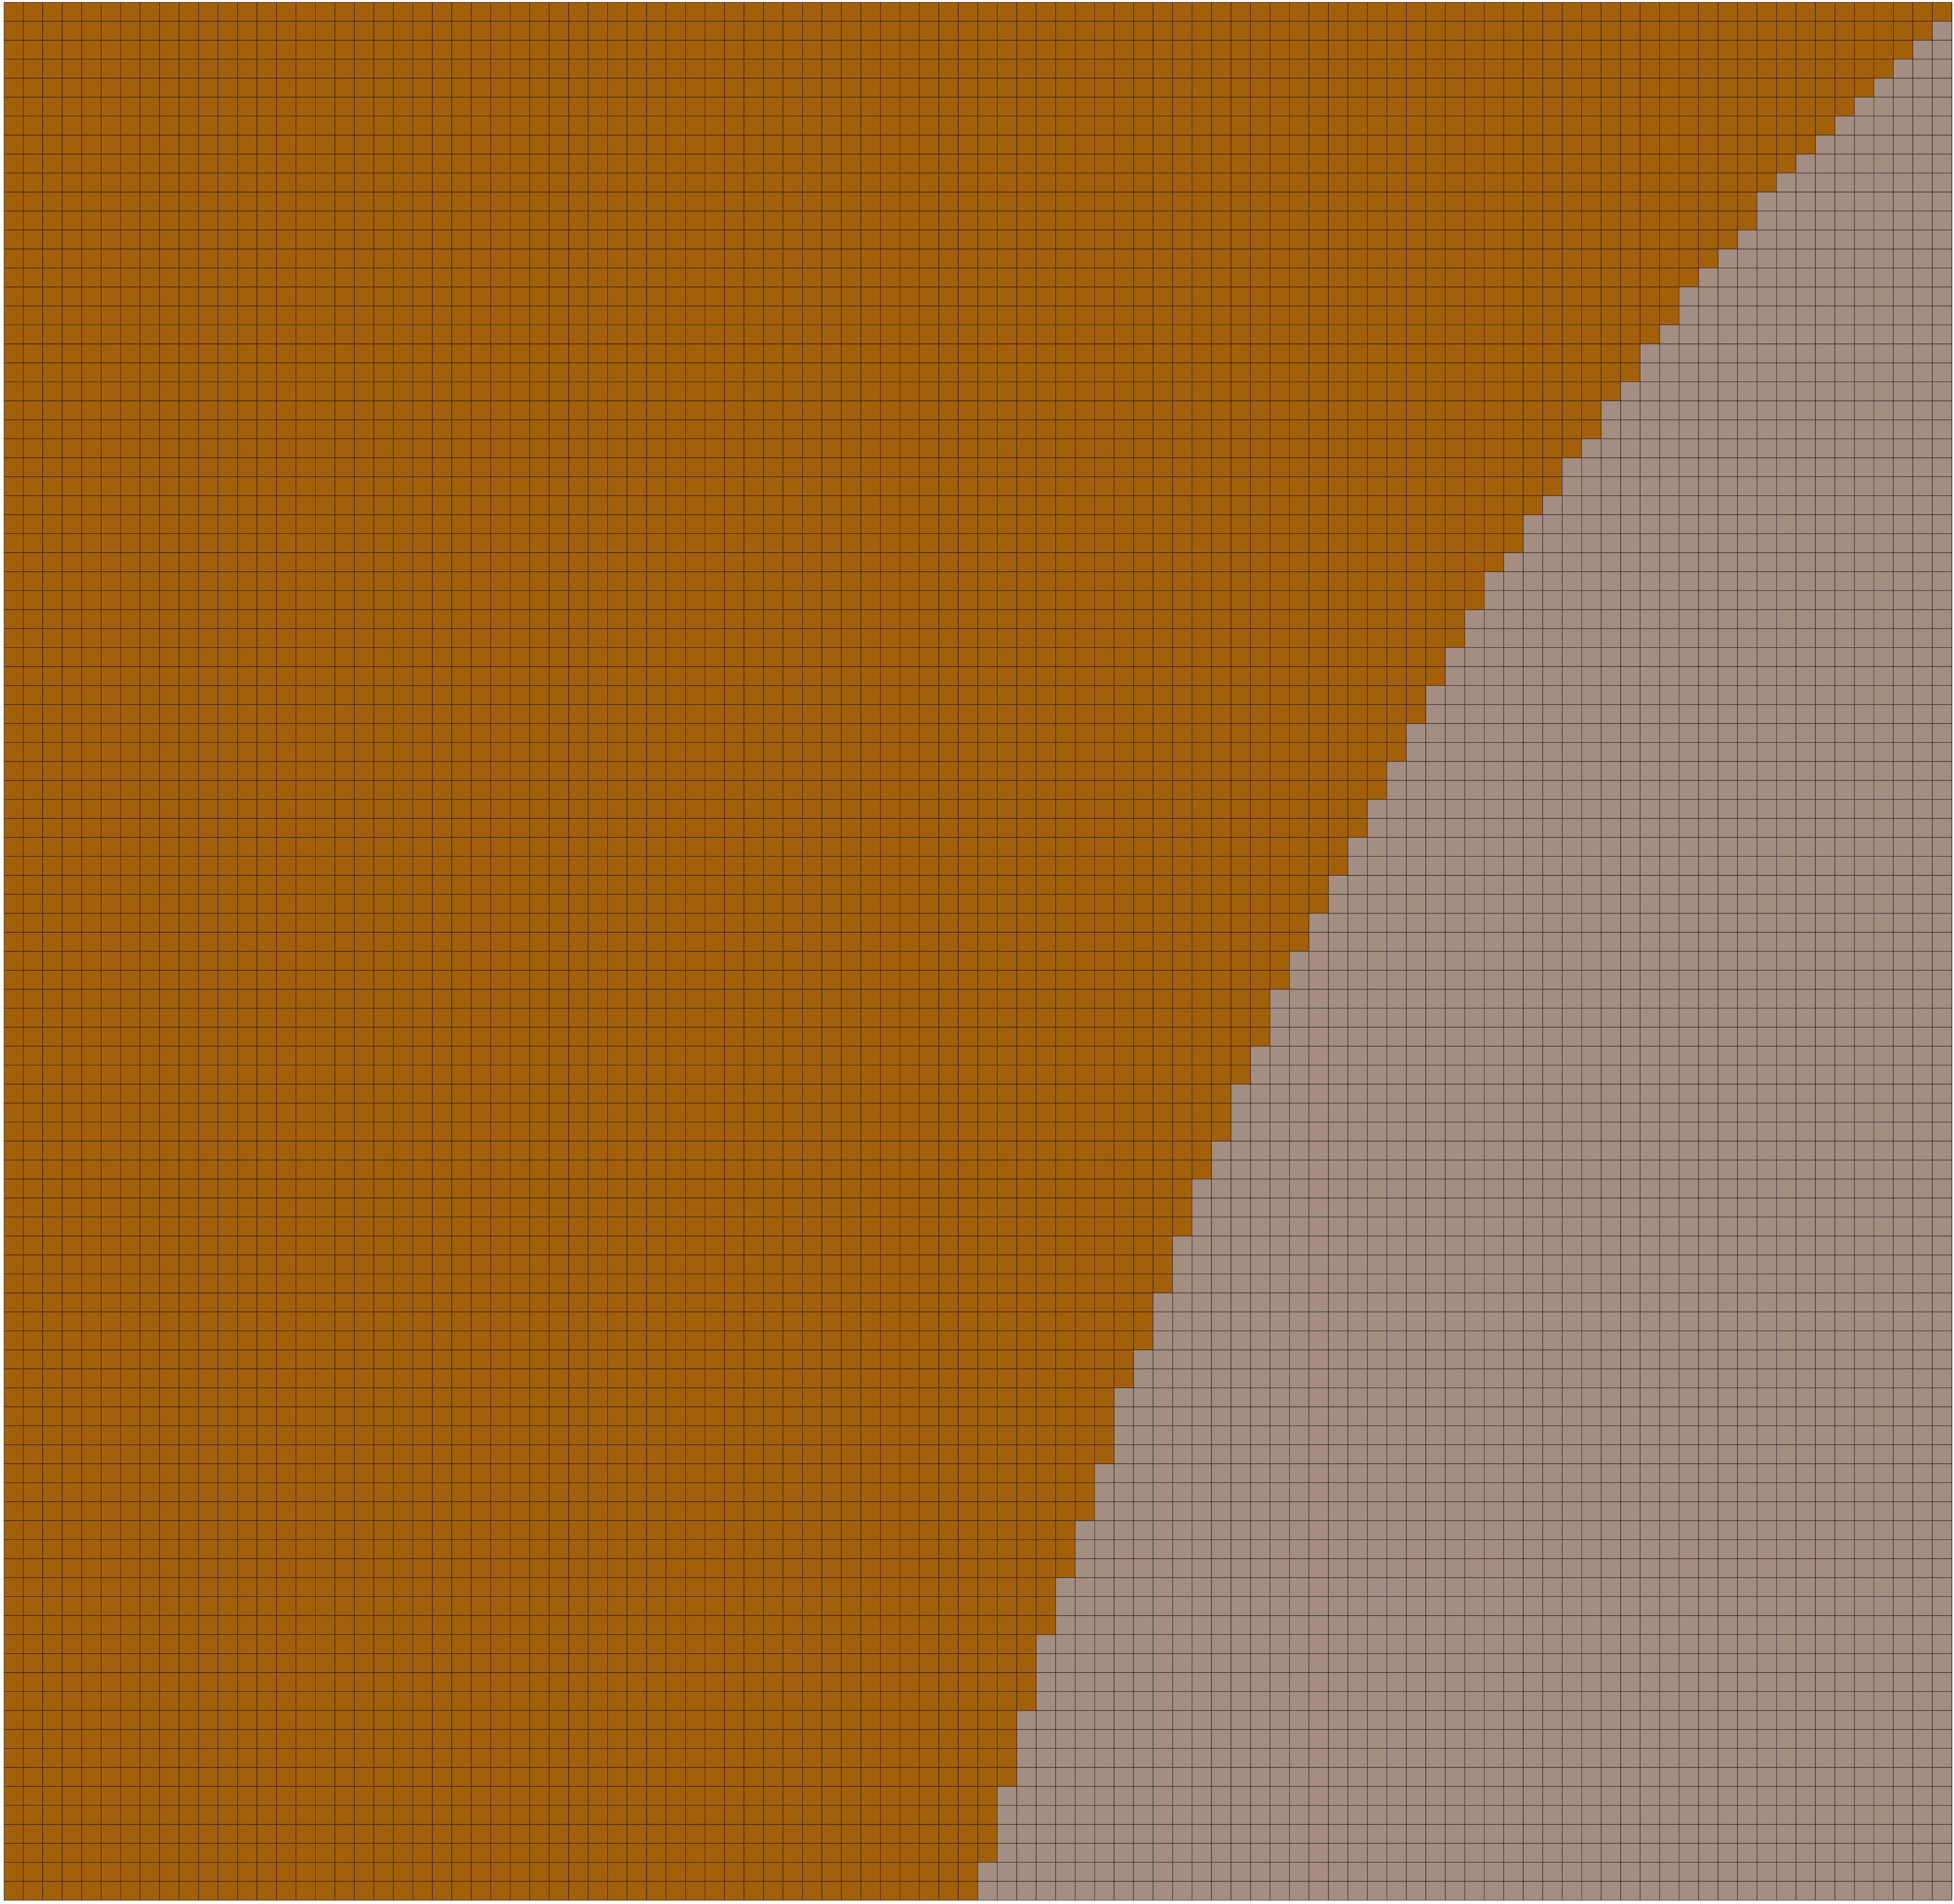

In [60]:
# a to c

disc = 100
bit = np.zeros((disc,disc))

t1s = np.linspace(0.00001,0.9999,disc)
t2s = np.linspace(0.00001,0.9999,disc)

cols = [np.array([163, 96, 10])/255, np.array([163,141,131])/255]
# orange brown cool brown

for i in range(len(t1s)):
    for j in range(len(t2s)):
        t1 = t1s[i]
        t2 = t2s[j]
        base = t1 * (vertices[2,:] - vertices[1,:]) + vertices[1,:]
        head = t2 * (vertices[1,:] - vertices[0,:]) + vertices[0,:]

        bllrd = Billiards(P) # instantiate the Billiards
        initial_condition = np.array([base,head])
        bllrd.dynamics(initial_condition = initial_condition,
                       num_its = 2)
        word = bllrd.symbolics
        if np.all(word == [0,1]):
            #second color
            bit[i,j] = 1
            # a to c to a
        elif np.all(word == [0,2]):
            #first color
            bit[i,j] = 0
            # a to c to b
        else:
            print("wtf")
            
plot_image(bit,cols)
plt.savefig("July11,2023/a_to_c_July_11.pdf",bbox_inches='tight')

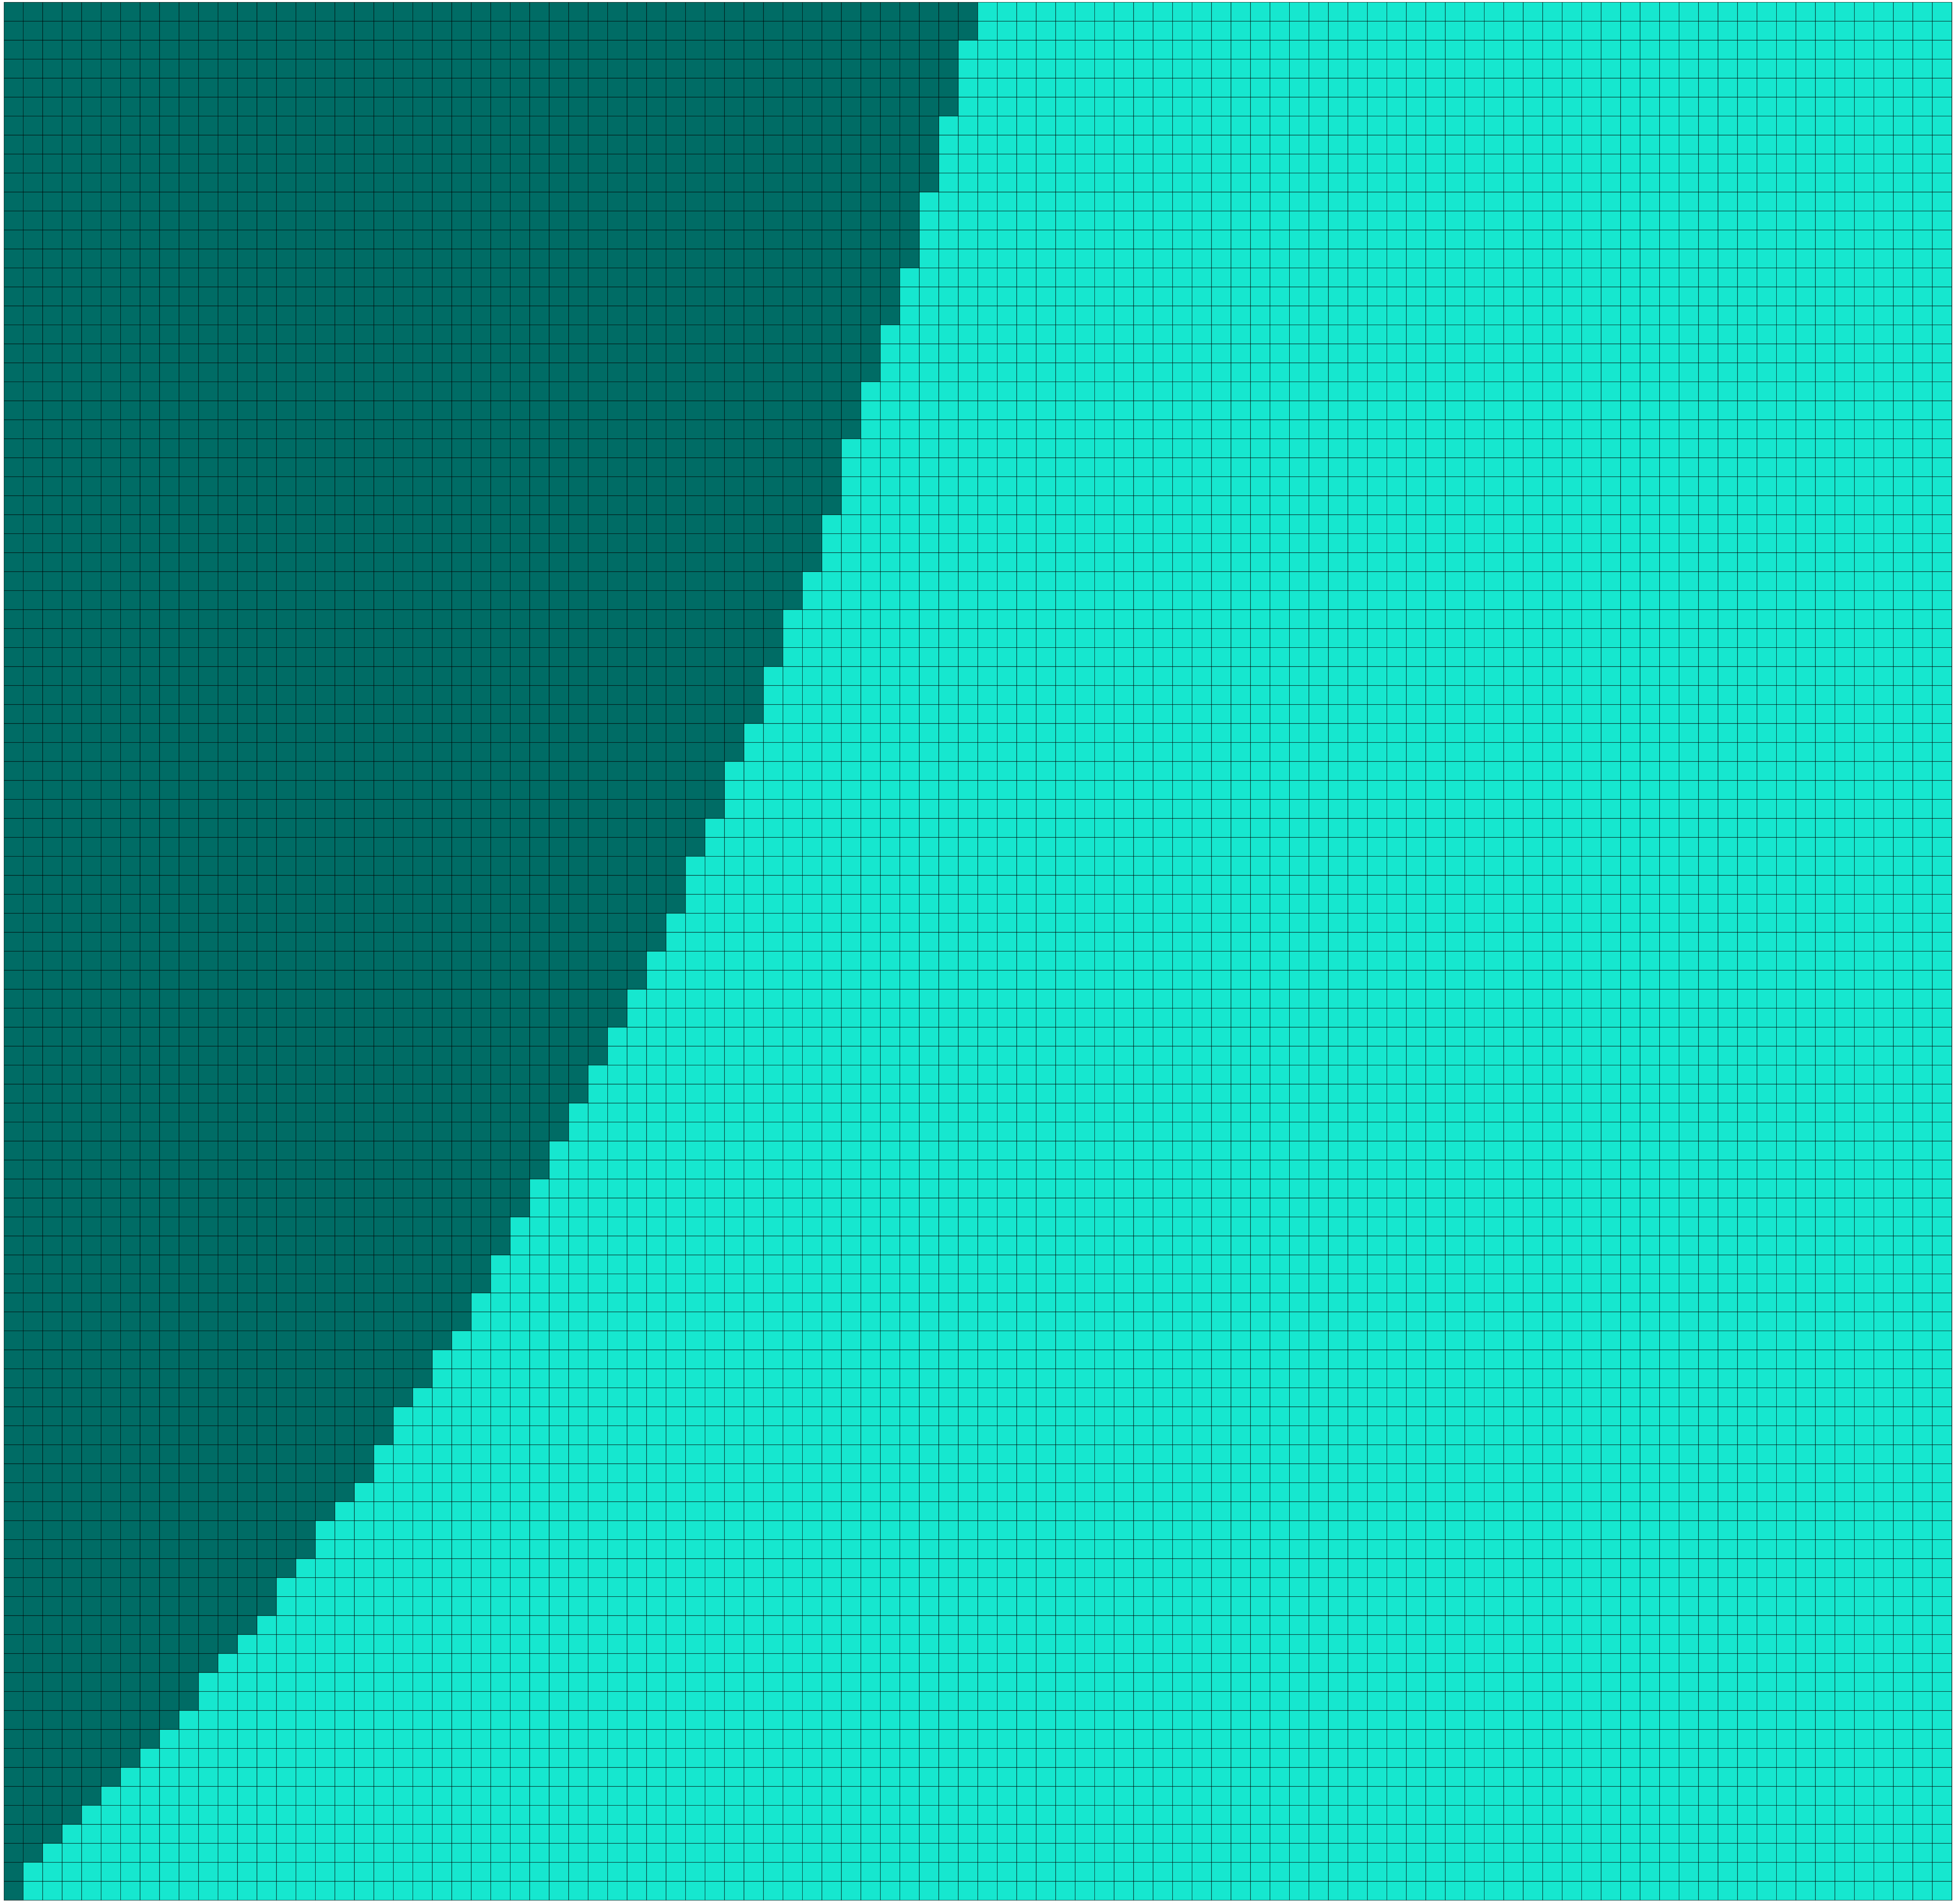

In [61]:
# b to c

disc = 100
bit = np.zeros((disc,disc))

t1s = np.linspace(0.00001,0.9999,disc)
t2s = np.linspace(0.00001,0.9999,disc)

cols = [np.array([0,108,101])/255, np.array([22,231,207])/255]
# dark turquoise light turquoise

for i in range(len(t1s)):
    for j in range(len(t2s)):
        t1 = t1s[i]
        t2 = t2s[j]
        base = t1 * (vertices[0,:] - vertices[2,:]) + vertices[2,:]
        head = t2 * (vertices[1,:] - vertices[0,:]) + vertices[0,:]

        bllrd = Billiards(P) # instantiate the Billiards
        initial_condition = np.array([base,head])
        bllrd.dynamics(initial_condition = initial_condition,
                       num_its = 2)
        word = bllrd.symbolics
        if np.all(word == [0,1]):
            #second color
            bit[i,j] = 1
            # b to c to a
        elif np.all(word == [0,2]):
            #first color
            bit[i,j] = 0
            # b to c to b
        else:
            print("wtf")
            
plot_image(bit,cols)
plt.savefig("July11,2023/b_to_c_July_11.pdf",bbox_inches='tight')

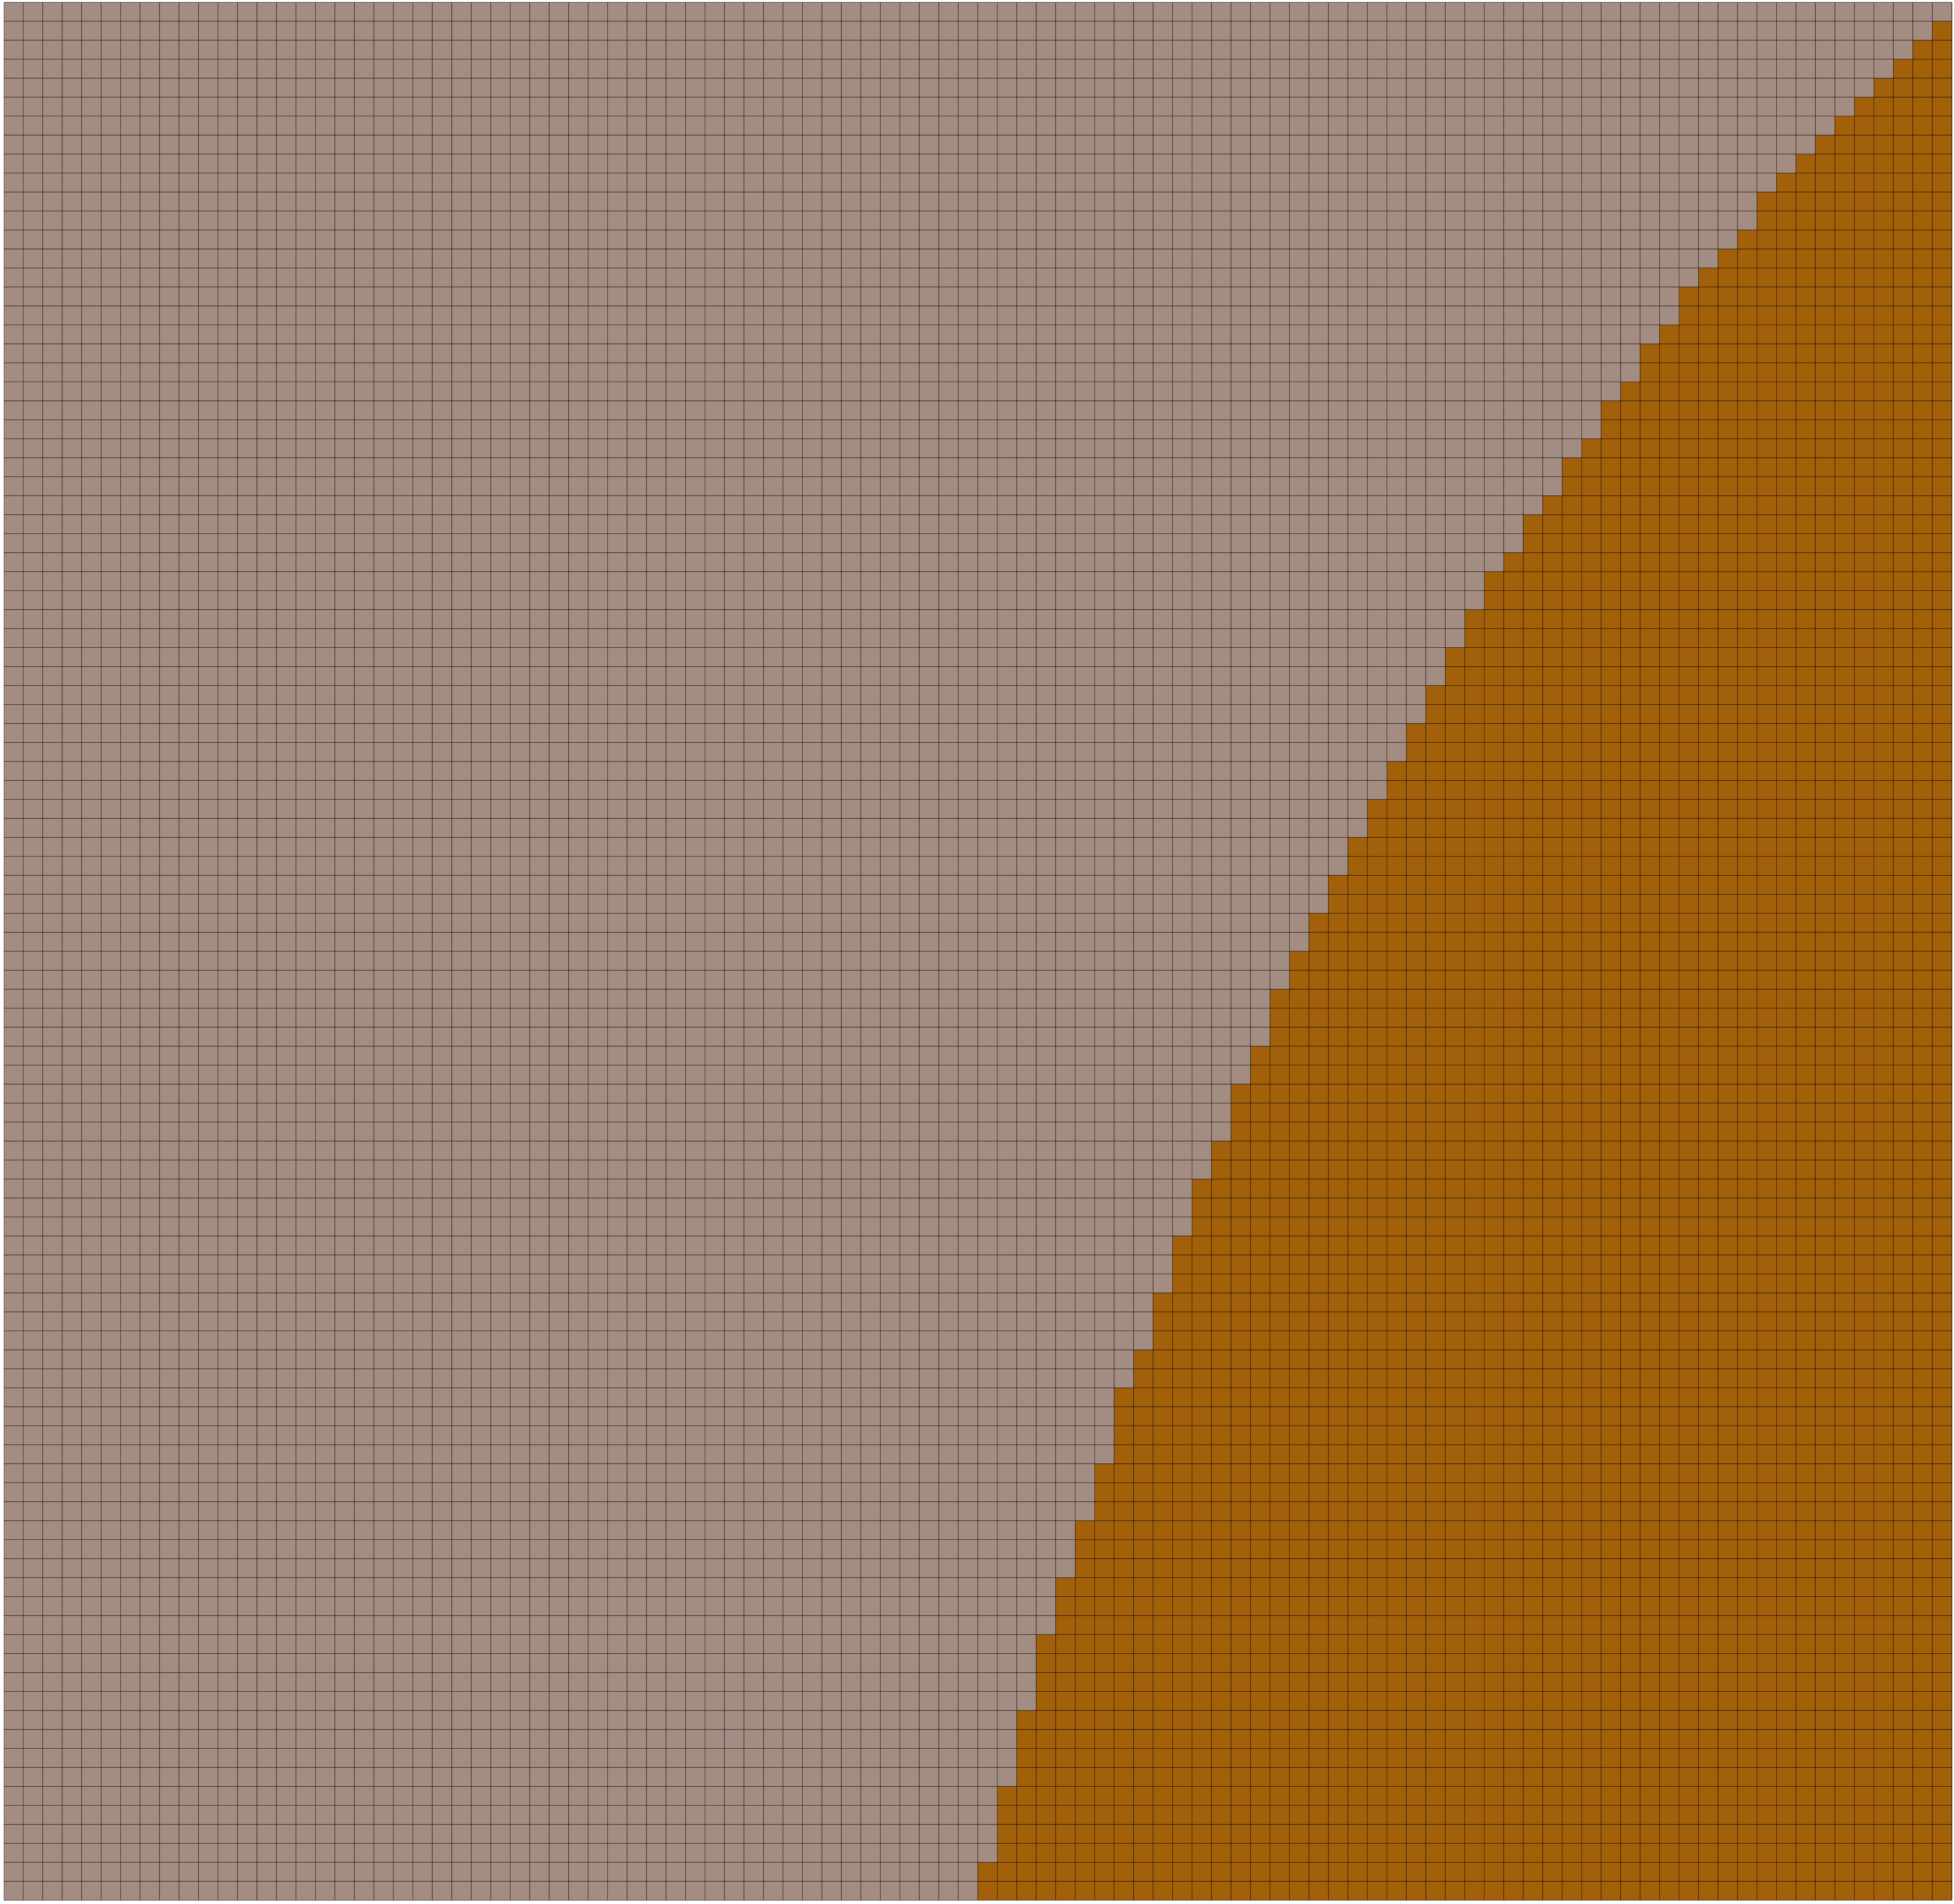

In [73]:
# b to a

disc = 100
bit = np.zeros((disc,disc))

t1s = np.linspace(0.00001,0.9999,disc)
t2s = np.linspace(0.00001,0.9999,disc)

cols = [np.array([163, 96, 10])/255, np.array([163,141,131])/255]
# orange brown cool brown

for i in range(len(t1s)):
    for j in range(len(t2s)):
        t1 = t1s[i]
        t2 = t2s[j]
        
        base = t1 * (vertices[0,:] - vertices[2,:]) + vertices[2,:]
        head = t2 * (vertices[2,:] - vertices[1,:]) + vertices[1,:]

        bllrd = Billiards(P) # instantiate the Billiards
        initial_condition = np.array([base,head])
        bllrd.dynamics(initial_condition = initial_condition,
                       num_its = 2)
        word = bllrd.symbolics
        if np.all(word == [1,0]):
            #second color
            bit[i,j] = 1
            # b to c to a
        elif np.all(word == [1,2]):
            #first color
            bit[i,j] = 0
            # b to c to b
        else:
            print("wtf")
            
plot_image(bit,cols)
plt.savefig("July11,2023/b_to_a_July_11.pdf",bbox_inches='tight')

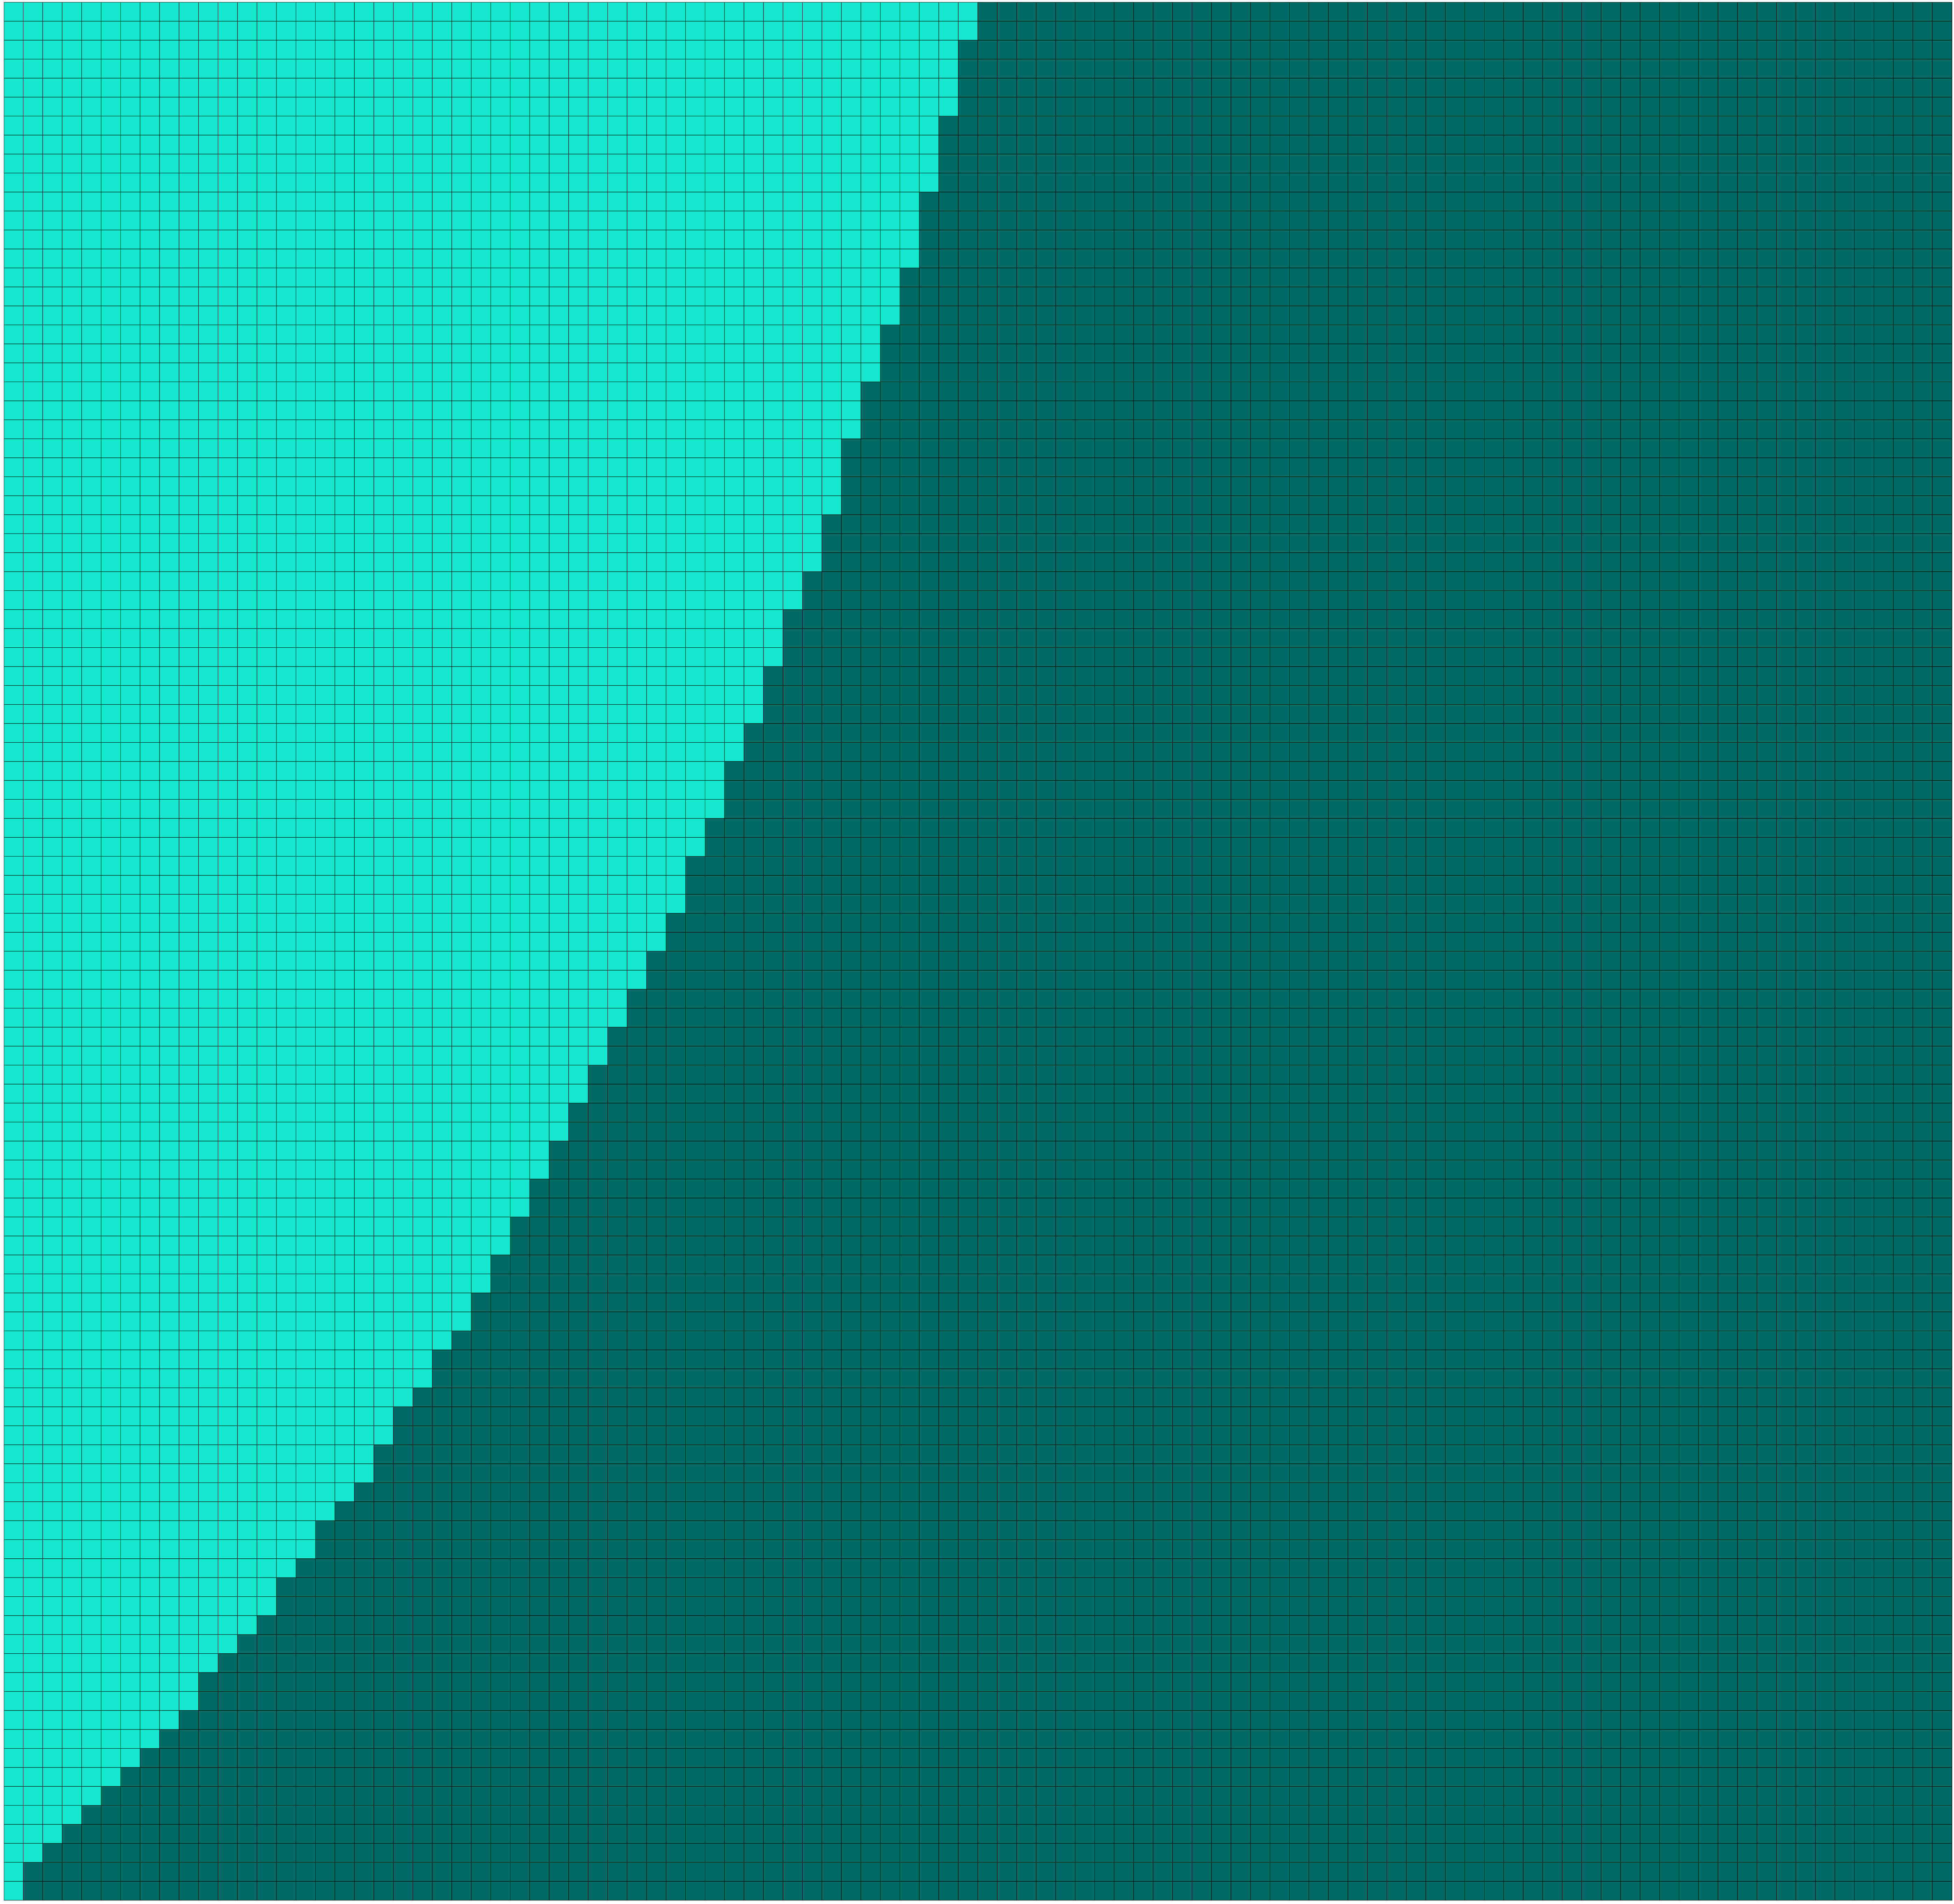

In [79]:
# c to a

disc = 100
bit = np.zeros((disc,disc))

t1s = np.linspace(0.00001,0.9999,disc)
t2s = np.linspace(0.00001,0.9999,disc)

cols = [np.array([0,108,101])/255, np.array([22,231,207])/255]
# dark turquoise light turquoise

for i in range(len(t1s)):
    for j in range(len(t2s)):
        t1 = t1s[i]
        t2 = t2s[j]
        base = t1 * (vertices[1,:] - vertices[0,:]) + vertices[0,:]
        head = t2 * (vertices[2,:] - vertices[1,:]) + vertices[1,:]
        bllrd = Billiards(P) # instantiate the Billiards
        initial_condition = np.array([base,head])
        bllrd.dynamics(initial_condition = initial_condition,
                       num_its = 2)
        word = bllrd.symbolics
        if np.all(word == [1,0]):
            #second color
            bit[i,j] = 1
            # c to a to c
        elif np.all(word == [1,2]):
            #first color
            bit[i,j] = 0
            # c to a to b
        else:
            print("wtf")
            
plot_image(bit,cols)
plt.savefig("July11,2023/c_to_a_July_11.pdf",bbox_inches='tight')

In [78]:
word

array([0, 0])

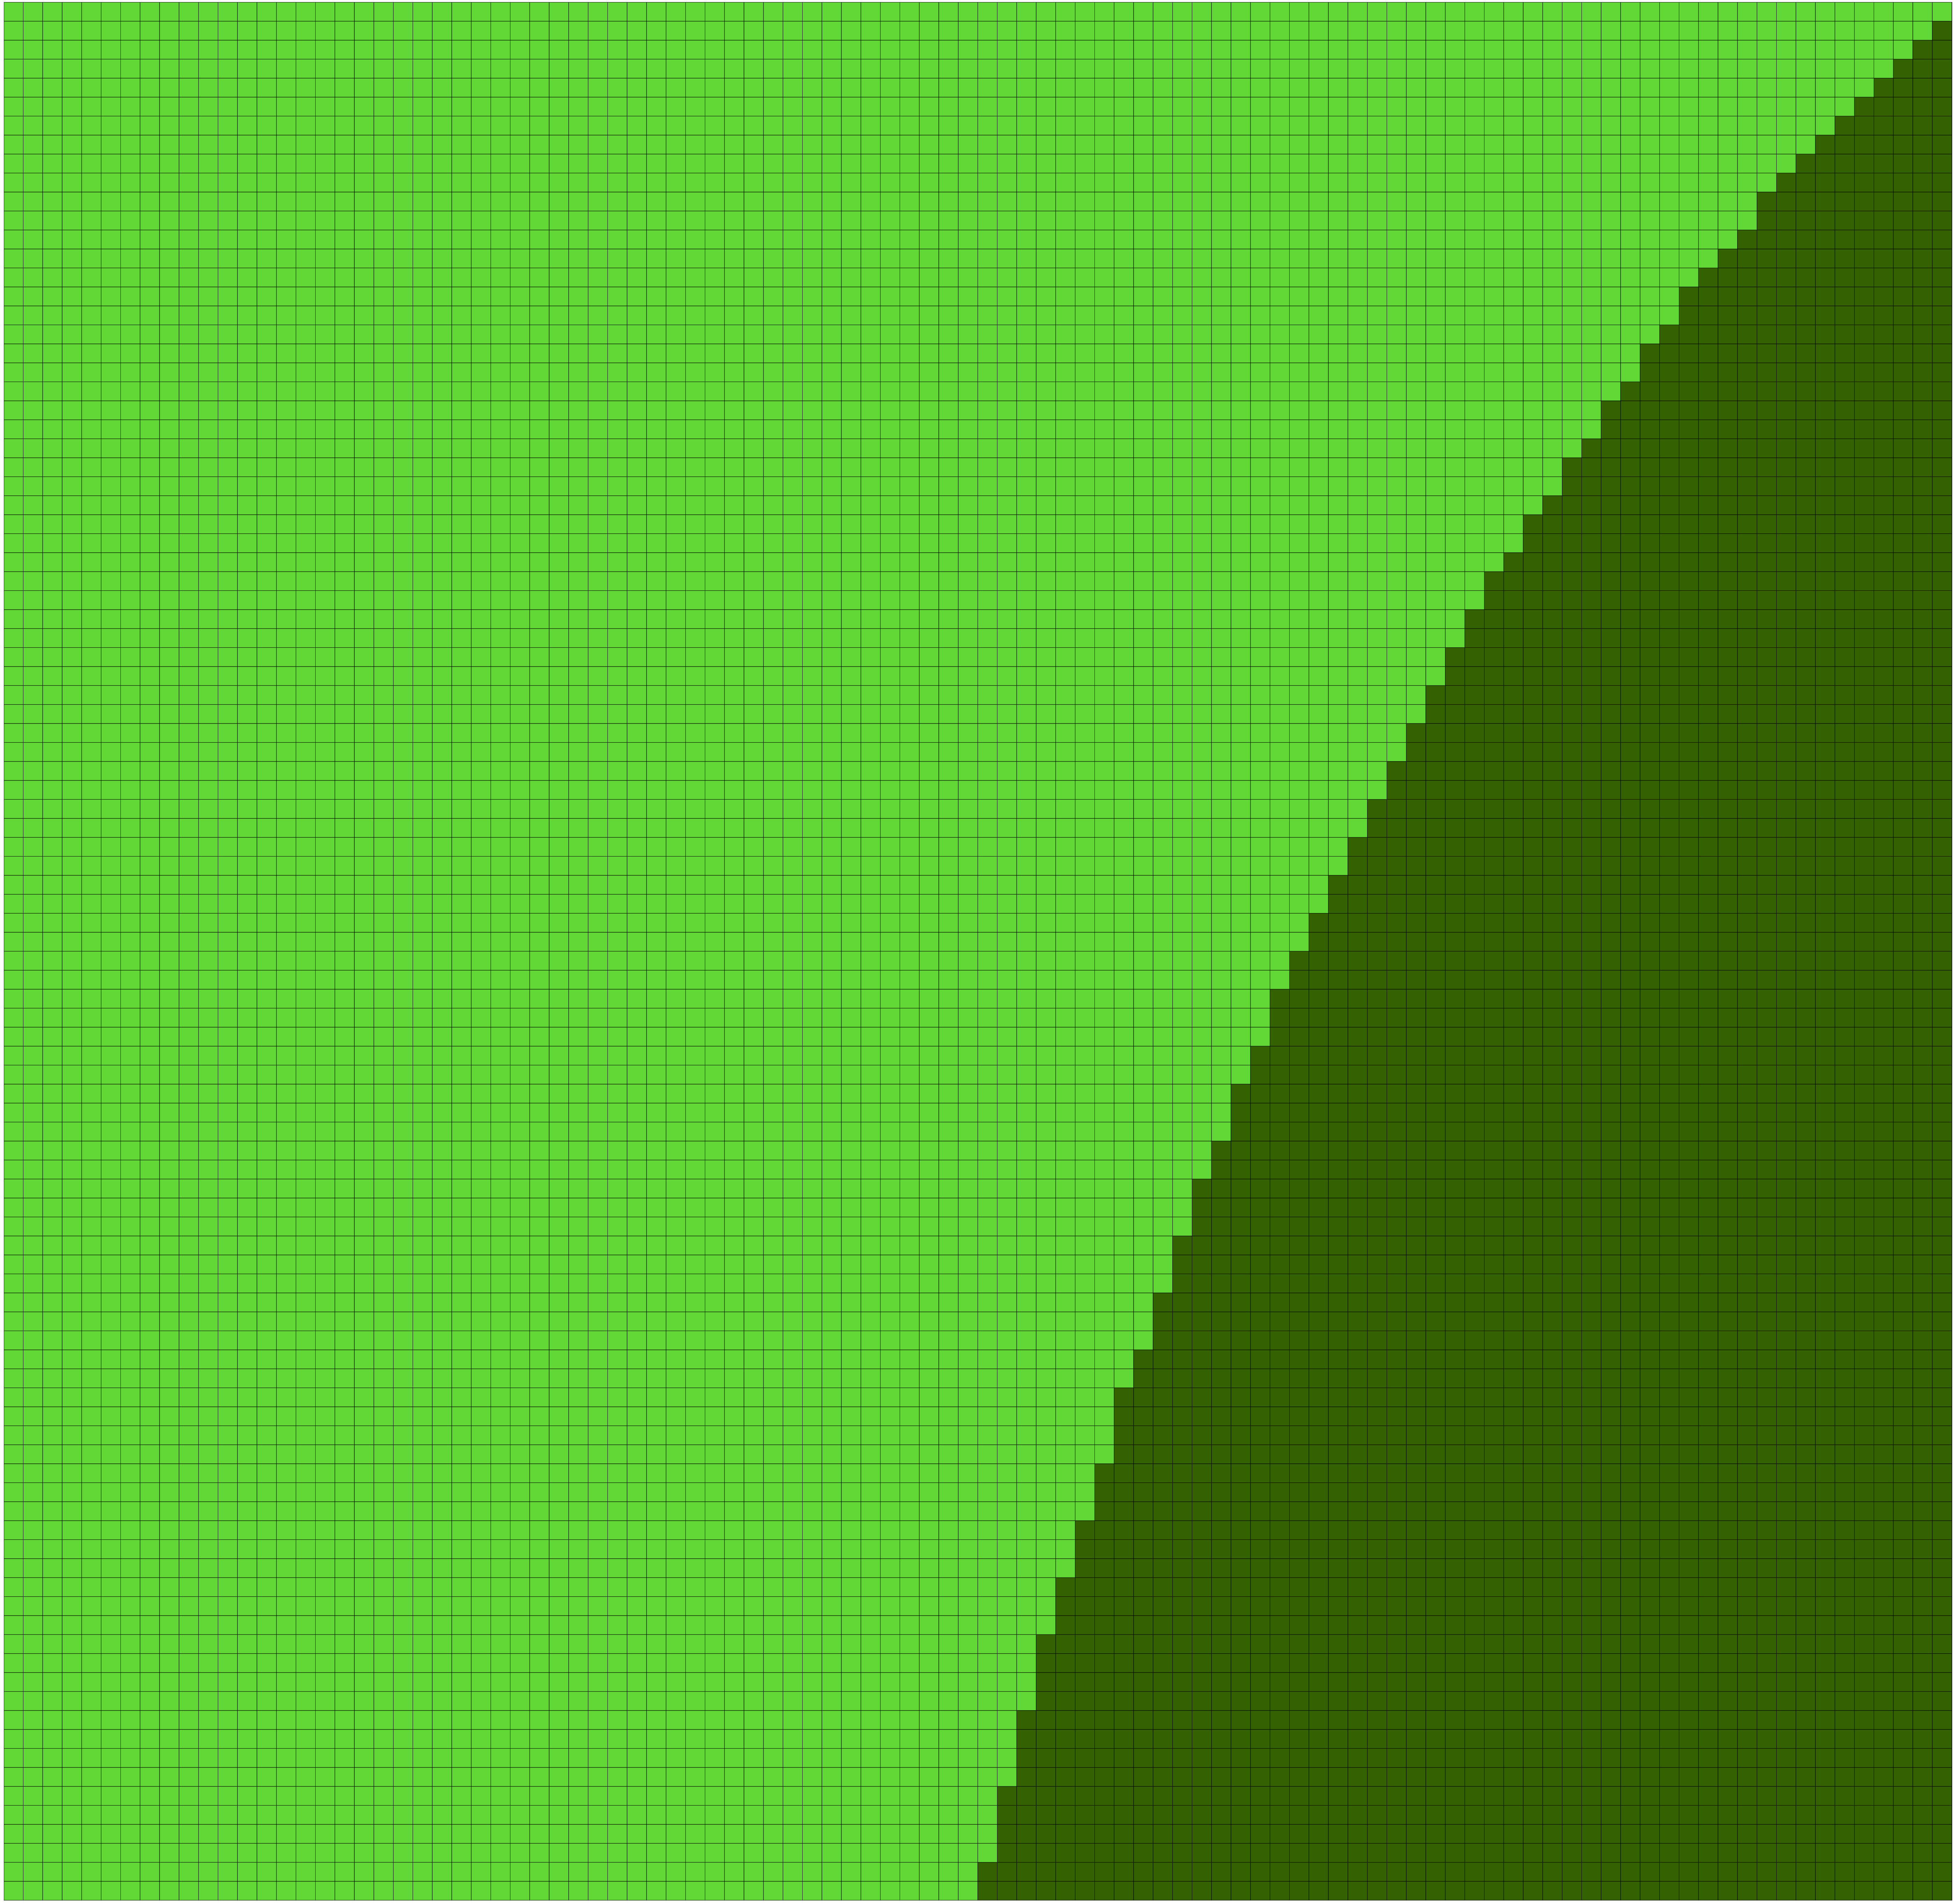

In [81]:
# c to b

disc = 100
bit = np.zeros((disc,disc))

t1s = np.linspace(0.00001,0.9999,disc)
t2s = np.linspace(0.00001,0.9999,disc)

cols = [np.array([97,216,54])/255, np.array([52,98,0])/255]
# light green, dark green

for i in range(len(t1s)):
    for j in range(len(t2s)):
        t1 = t1s[i]
        t2 = t2s[j]
        base = t1 * (vertices[1,:] - vertices[0,:]) + vertices[0,:]
        head = t2 * (vertices[0,:] - vertices[2,:]) + vertices[2,:]

        bllrd = Billiards(P) # instantiate the Billiards
        initial_condition = np.array([base,head])
        bllrd.dynamics(initial_condition = initial_condition,
                       num_its = 2)
        word = bllrd.symbolics
        if np.all(word == [2, 0]):
            # second color
            bit[i,j] = 1
            # a to b to c
        if np.all(word == [2, 1]):
            # first color
            bit[i,j] = 0
            
            # a to b to a
            
plot_image(bit,cols)
plt.savefig("July11,2023/c_to_b_July_11.pdf",bbox_inches='tight')
